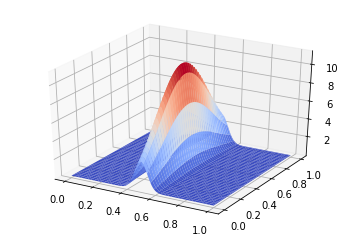

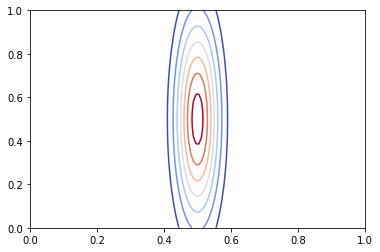

In [57]:
import numpy as np
import scipy as scipy
from scipy.stats import norm, multivariate_normal

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')

fig = plt.figure(2)
ax2 = fig.add_subplot(111)

x = np.linspace(0,1,128)
y = np.linspace(0,1,128)

xv,yv = np.meshgrid(x,y)

# print(xv)
# print(yv)

mu = [0.5,0.5] # mean..

sigma = [[0.002,0],[0,0.1]] # variance..

rv = multivariate_normal(mean=mu,cov=sigma)

cmesh = np.stack([xv,yv],axis=-1).astype('float32') #3d tensor, last axis [xv,yv]

d = rv.pdf(cmesh)

ax.plot_surface(xv,yv,d,cmap=cm.coolwarm)
ax2.contour(xv,yv,d,cmap=cm.coolwarm)

plt.show()

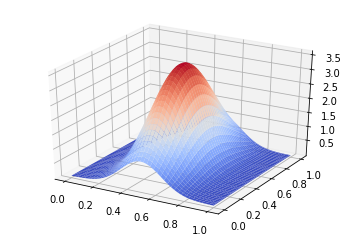

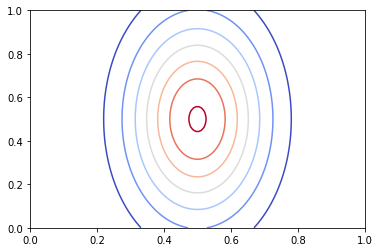

In [56]:
import tensorflow as tf
from tensorflow.contrib.distributions import MultivariateNormalDiag as mnd
from tensorflow.contrib.distributions import MultivariateNormalFull as mnf

cv = tf.Variable(cmesh)
unit_variance = tf.Variable([1.,1.])

mndi = mnd([0.5,0.5], unit_variance * 0.1) # mnd instance
mnfi = mnf(mu, sigma) # mnf instance

# pd = mndi.pdf(cv)
pd = mnfi.pdf(cv)

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    d = sess.run(pd)
    
fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d')

fig = plt.figure(4)
ax2 = fig.add_subplot(111)

ax.plot_surface(xv,yv,d,cmap=cm.coolwarm)
ax2.contour(xv,yv,d,cmap=cm.coolwarm)
plt.show()
    